# The birth of the economists on DBpedia

We will extract data on economists through requests to DBpedia.

In [1]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter
import pandas as pd

In [2]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql") ##, returnFormat=RDFXML)

In [120]:
query = """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT DISTINCT ?economist ?name (year(xsd:dateTime(?Birth_Date)) AS ?year)

WHERE
     {
        {?economist ?propriety dbr:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        FILTER (CONTAINS(?name, " "))
      
        BIND(STRAFTER(STR(?nationality1),"http://dbpedia.org/resource/") AS ?nationality2)
        BIND(REPLACE(STR(?nationality2),"[_]"," ") AS ?nationality3)
        BIND(REPLACE(STR(?nationality3),"United States of America", "United States") AS ?nationality4)
        BIND(REPLACE(STR(?nationality4),"Americans", "United States") AS ?nationality5)
        BIND(REPLACE(STR(?nationality5),"American people", "United States") AS ?nationality6)
        BIND(REPLACE(STR(?nationality6),"United States nationality", "United States") AS ?nationality)
        }
     UNION
        {
         ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .

        BIND(STRAFTER(STR(?nationality1),"http://dbpedia.org/resource/") AS ?nationality2)
        BIND(REPLACE(STR(?nationality2),"[_]"," ") AS ?nationality3)
        BIND(REPLACE(STR(?nationality3),"United States of America", "United States") AS ?nationality4)
        BIND(REPLACE(STR(?nationality4),"Americans", "United States") AS ?nationality5)
        BIND(REPLACE(STR(?nationality5),"American people", "United States") AS ?nationality6)
        BIND(REPLACE(STR(?nationality6),"United States nationality", "United States") AS ?nationality)

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        }
        UNION
       {
        ?economist a dbo:Professor .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .

        FILTER (CONTAINS(?abstract, "Economist") || CONTAINS(?abstract, "economist") || CONTAINS(?abstract, "économiste")  || CONTAINS(?abstract, "Économiste"))
        FILTER (CONTAINS(?name, " "))
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
       }
       UNION
       {
        ?economist a dbo:Person .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
       
       FILTER (CONTAINS(?name, " "))
        FILTER (CONTAINS(?abstract, "Economist") || CONTAINS(?abstract, "economist") || CONTAINS(?abstract, "économiste")  || CONTAINS(?abstract, "Économiste"))
        BIND(STRAFTER(STR(?nationality1),"http://dbpedia.org/resource/") AS ?nationality2)
        BIND(REPLACE(STR(?nationality2),"[_]"," ") AS ?nationality3)
        BIND(REPLACE(STR(?nationality3),"United States of America", "United States") AS ?nationality4)
        BIND(REPLACE(STR(?nationality4),"Americans", "United States") AS ?nationality5)
        BIND(REPLACE(STR(?nationality5),"American people", "United States") AS ?nationality6)
        BIND(REPLACE(STR(?nationality6),"United States nationality", "United States") AS ?nationality)

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
  }
     }
"""

In [106]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [107]:
# Number of rows in the result
len(rc['results']['bindings'])

4773

In [108]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Lucrezia_Reichlin'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Lucrezia Reichlin'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1954'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_Bamberger'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig Bamberger'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1823'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_von_Mises'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig von Mises'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1881'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luigi_Amoroso'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luigi Amoroso'}, 'year': {'type': 'typed-

In [109]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        try: 
            name = l['name']['value']
            print([l['economist']['value'],name,l['year']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['economist']['value'],name,l['year']['value']])
            except :
                print([l['economist']['value'],'',l['year']['value']])

        i += 1

['http://dbpedia.org/resource/Lucrezia_Reichlin', 'Lucrezia Reichlin', '1954']
['http://dbpedia.org/resource/Ludwig_Bamberger', 'Ludwig Bamberger', '1823']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', '1881']
['http://dbpedia.org/resource/Luigi_Amoroso', 'Luigi Amoroso', '1886']
['http://dbpedia.org/resource/Luigi_Bodio', 'Luigi Bodio', '1840']


In [110]:
# Explore
yearsList = []
for l in rc['results']['bindings']:
    yearsList.append(l['year']['value'])

In [111]:
min(yearsList), max(yearsList)

('1800', '2000')

In [112]:
yearsList.sort()

In [113]:
counterYearsList= Counter(yearsList)
groupedYearsList = list(zip(counterYearsList.keys(), counterYearsList.values()))
groupedYearsList

[('1800', 1),
 ('1801', 4),
 ('1803', 2),
 ('1804', 3),
 ('1805', 3),
 ('1806', 2),
 ('1807', 1),
 ('1808', 2),
 ('1809', 3),
 ('1810', 2),
 ('1811', 1),
 ('1812', 3),
 ('1813', 5),
 ('1814', 3),
 ('1815', 2),
 ('1816', 2),
 ('1817', 3),
 ('1818', 4),
 ('1819', 2),
 ('1820', 3),
 ('1821', 2),
 ('1822', 6),
 ('1823', 5),
 ('1824', 1),
 ('1825', 3),
 ('1826', 2),
 ('1827', 5),
 ('1828', 2),
 ('1830', 3),
 ('1833', 4),
 ('1834', 5),
 ('1835', 4),
 ('1837', 1),
 ('1838', 8),
 ('1839', 5),
 ('1840', 5),
 ('1841', 6),
 ('1842', 4),
 ('1843', 1),
 ('1844', 5),
 ('1845', 4),
 ('1846', 2),
 ('1847', 7),
 ('1848', 1),
 ('1849', 4),
 ('1850', 4),
 ('1851', 8),
 ('1852', 6),
 ('1853', 6),
 ('1854', 7),
 ('1855', 2),
 ('1856', 6),
 ('1857', 5),
 ('1858', 3),
 ('1859', 5),
 ('1860', 6),
 ('1861', 9),
 ('1862', 7),
 ('1863', 6),
 ('1864', 5),
 ('1865', 10),
 ('1866', 8),
 ('1867', 10),
 ('1868', 6),
 ('1869', 4),
 ('1870', 8),
 ('1871', 5),
 ('1872', 6),
 ('1873', 10),
 ('1874', 13),
 ('1875', 10),
 

In [114]:
# Transform years from string to integer
groupedYearsList = [[int(i[0]), i[1]] for i in groupedYearsList]

In [115]:
### Create a list of five years period, i.e. the list of the first year of each period
d_list = []
period = 5
d_start = 1800
d_list.append(d_start)

i = 0
while i < 35:
    d_start = d_start + period
    d_list.append(d_start)
    i += 1

In [116]:
print(d_list[:2])
min(d_list), max(d_list)

[1800, 1805]


(1800, 1975)

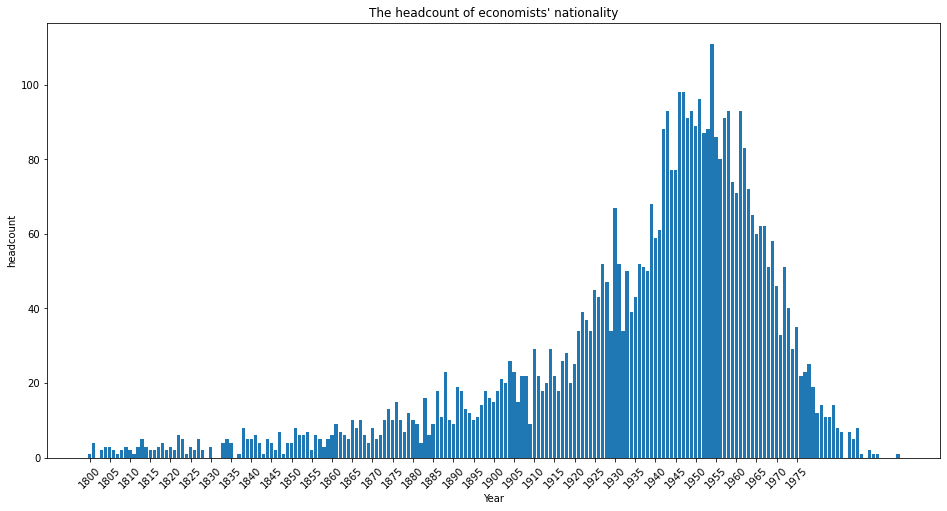

In [117]:
objects = [l[0] for l in groupedYearsList]
eff = [l[1] for l in groupedYearsList]

p1 = plt.bar(objects, eff)

plt.xticks(d_list)
plt.xlabel('Year')
plt.ylabel('headcount')
plt.title("The headcount of economists' nationality")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
## Change of fontsize and angle of xticklabels
plt.show()

In [118]:
# Grouping by five year period
i_list = []
for i in d_list:
    i_n = 0
    for l in groupedYearsList:
        if l[0] >= i and l[0] < (i + 5):
            i_n = i_n + l[1]
    i_list.append([i, i_n])

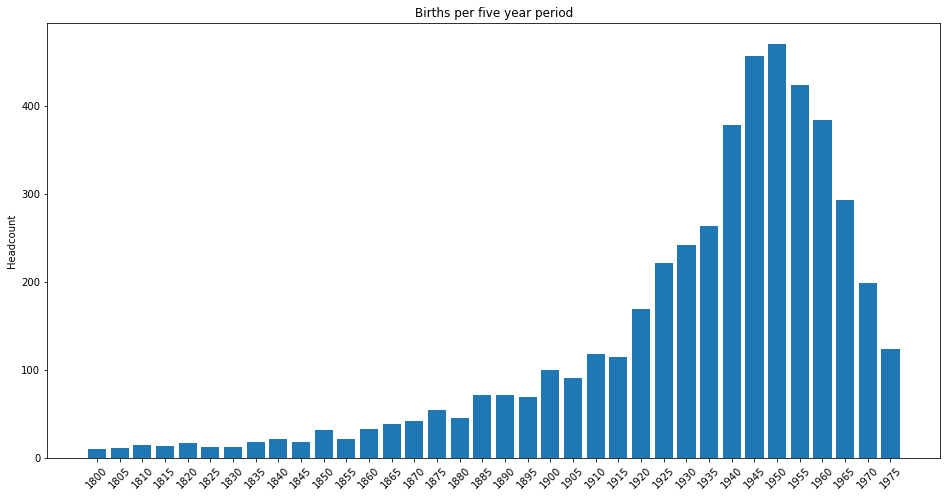

In [119]:
# Distribution by 5-year period

objects = [str(l[0]) for l in i_list]
eff = [l[1] for l in i_list]
p1 = plt.bar(objects, eff)
plt.ylabel('Headcount')
plt.title('Births per five year period')
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()
